---
title: "Data Touring 2"
author: "Y Lee"
date: "`r Sys.Date()`"
output: html_document
---

In [1]:
import pandas as pd
from plotnine import *
from plotnine.data import *

import sklearn
import skmisc

%matplotlib inline

## Data Touring 2

* Data

    - Iris, Penguins
    
    - MNIST, Cifar10, Cifar100
    
    - Sunspots, Trees, Faithful
    
    - Pima, Crab, Olive, Dnut, kyphosis
    
    - Diamonds, Starwars, GoogleStockPrice 
    
    - Gapminder, MovieLense
    
## sunspots data

R에는 sunspots 이라는 이름으로, 태양의 흑점을 기록한 자료가 들어 있다. 

[help(sunspots) ](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/sunspot.month.html)

+ sunspots 자료는 태양 흑점 개수의 월별 평균값을 기록한 자료

+ 1794년부터 1959년 까지는 스위스 연방 관측소에서 관측한 자료, 

+ 1960년 이후는 도쿄천문대에서 관측한 자료에서 수집.




+ Extracting Sunspots
```R
res <- data.frame(date=time(sunspots), as.matrix(sunspots))
res$year <- trunc(res$date)
res$month <- (res$date - res$year) * 12 + 1
res <- res[, c(1,3,4,2)]
colnames(res) <- c('date','year','month','n')
write.csv(res,"sunspots.csv")
```

,date,year,month,n
1,1749.000000,1749,1.0,58.0
2,1749.083333,1749,2.0,62.6
3,1749.166667,1749,3.0,70.0
4,1749.250000,1749,4.0,55.7
5,1749.333333,1749,5.0,85.0


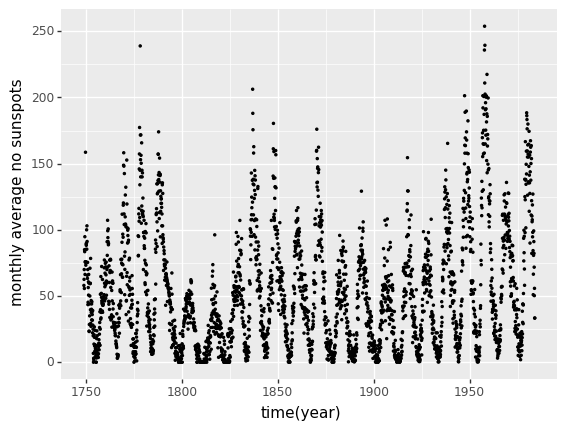

<ggplot: (183570285815)>

In [2]:
sunspots = pd.read_csv("sunspots.csv",index_col=0)
display(sunspots.head())

p = ggplot(aes(x='date', y='n'), sunspots)
p + geom_point(size=0.4) + xlab('time(year)')+  ylab('monthly average no sunspots')

1       1749.000000
2       1749.083333
3       1749.166667
4       1749.250000
5       1749.333333
           ...     
2816    1983.583333
2817    1983.666667
2818    1983.750000
2819    1983.833333
2820    1983.916667
Name: date, Length: 2820, dtype: float64

### [loess](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/loess): Local Polynomial Regression Fitting 
loess(formula, data, weights, subset, na.action, model = FALSE,
      span = 0.75, enp.target, degree = 2,
      parametric = FALSE, drop.square = FALSE, normalize = TRUE,
      family = c("gaussian", "symmetric"),
      method = c("loess", "model.frame"),
      control = loess.control(…), …)

In [11]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'config_context',
 'decomposition',
 'exceptions',
 'externals',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'neighbors',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'utils']

In [14]:
dir(skmisc)

['__SKMISC_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'numpy',
 'show_config',
 'test']

In [4]:
skmisc.loess(sunspots["date"],sunspots["n"])

AttributeError: module 'skmisc' has no attribute 'loess'

In [26]:
res = loess(spots~xt,span=0.2)
res = skmisc.loess.loess

pr = p+geom_line(aes(xt,predict(res)),col="red")
pr

SyntaxError: invalid syntax (1347256297.py, line 1)